In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [102]:
df = pd.read_excel(r"C:\Users\VICTUS\Desktop\fipsar copper\Copper_Set (1).xlsx")

In [103]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [104]:
df.drop(columns=['id','material_ref'], inplace=True)

In [105]:
df.dtypes

item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [106]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date_new'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date_new'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [107]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_new,delivery date_new
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [108]:
df.isnull().sum()

item_date             1
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
product_ref           0
delivery date         1
selling_price         1
item_date_new         3
delivery date_new     3
dtype: int64

In [109]:
# df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)

In [110]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [111]:
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x <= 0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x <= 0 else x)

In [112]:
df.isnull().sum()

item_date             1
quantity tons         5
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
product_ref           0
delivery date         1
selling_price         8
item_date_new         3
delivery date_new     3
dtype: int64

In [113]:
df['item_date_new'].fillna(df['item_date_new'].mode().iloc[0], inplace=True)
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0], inplace=True)
df['delivery date_new'].fillna(df['delivery date_new'].mode().iloc[0], inplace=True)
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [114]:
df.isnull().sum()

item_date            1
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
product_ref          0
delivery date        0
selling_price        0
item_date_new        0
delivery date_new    0
dtype: int64

In [115]:
df.drop('item_date', axis = 1, inplace = True)

In [116]:
df.rename(columns = {'item_date_new': 'item_date'}, inplace = True)

In [117]:
df.isnull().sum()

quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
product_ref          0
delivery date        0
selling_price        0
item_date            0
delivery date_new    0
dtype: int64

In [118]:
df.drop('delivery date', axis = 1, inplace = True)

In [119]:
df.rename(columns = {'delivery date_new': 'delivery date'}, inplace = True)

In [120]:
df.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
item_date        0
delivery date    0
dtype: int64

In [121]:
df.dtypes

quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
selling_price    float64
item_date         object
delivery date     object
dtype: object

In [122]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [123]:
df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [124]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date,delivery date
0,54.151139,30156308.0,28.0,1,W,10.0,2.00,1500.0,1670798778,854.00,2021-04-01,2021-07-01
1,768.024839,30202938.0,25.0,1,W,41.0,0.80,1210.0,1668701718,1047.00,2021-04-01,2021-04-01
2,386.127949,30153963.0,30.0,1,WI,28.0,0.38,952.0,628377,644.33,2021-04-01,2021-01-01
3,202.411065,30349574.0,32.0,1,S,59.0,2.30,1317.0,1668701718,768.00,2021-04-01,2021-01-01
4,785.526262,30211560.0,28.0,1,W,10.0,4.00,2000.0,640665,577.00,2021-04-01,2021-03-01


In [125]:
columns_to_visualise = ['quantity tons','customer', 'country','application','thickness','width', 'selling_price']
def distribution(data, col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data = data, x=col)
    plt.title(f'Box Plot for {col}')

    plt.subplot(1,2,2)
    sns.histplot(data=data, x=col, kde=True, bins=50)
    plt.title(f'Distribution Plot for {col}')
    plt.show()

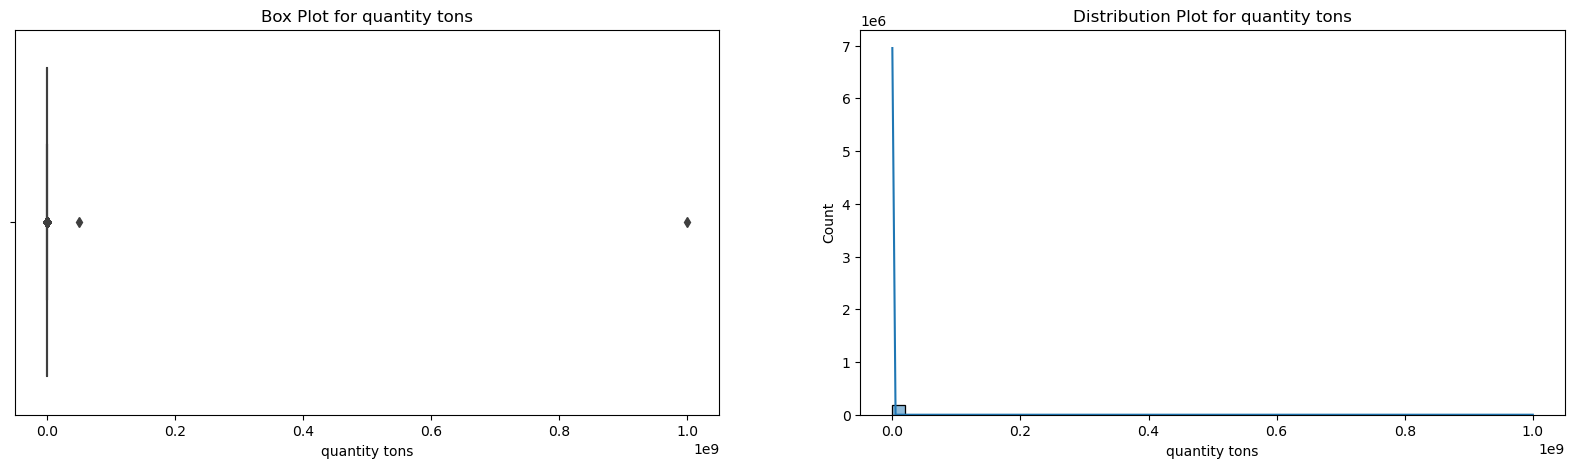

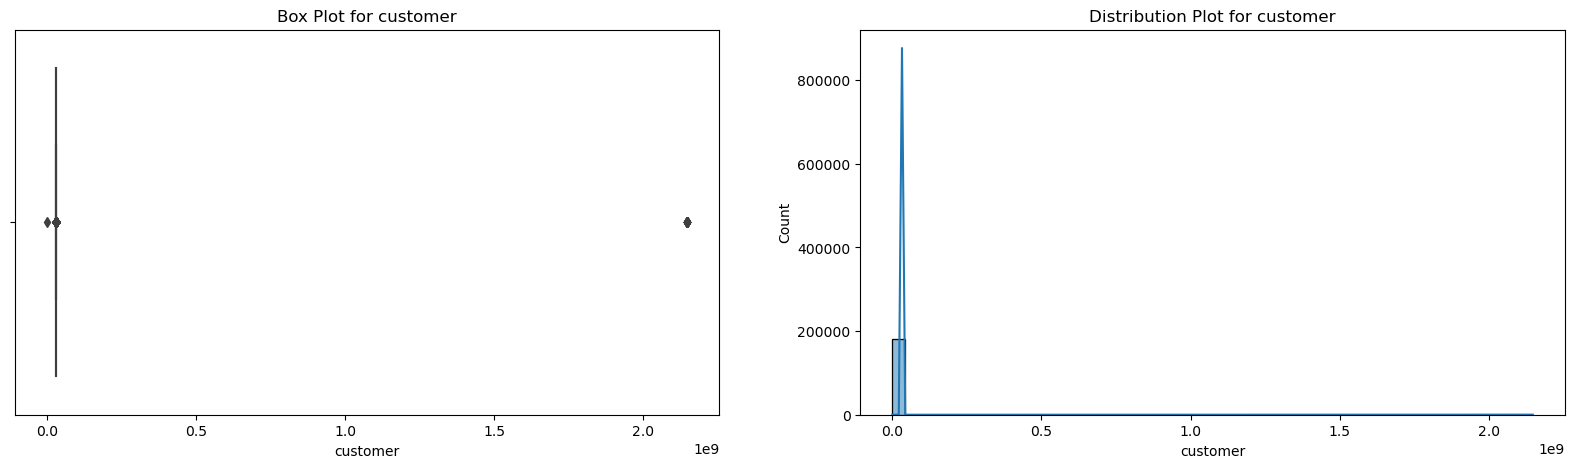

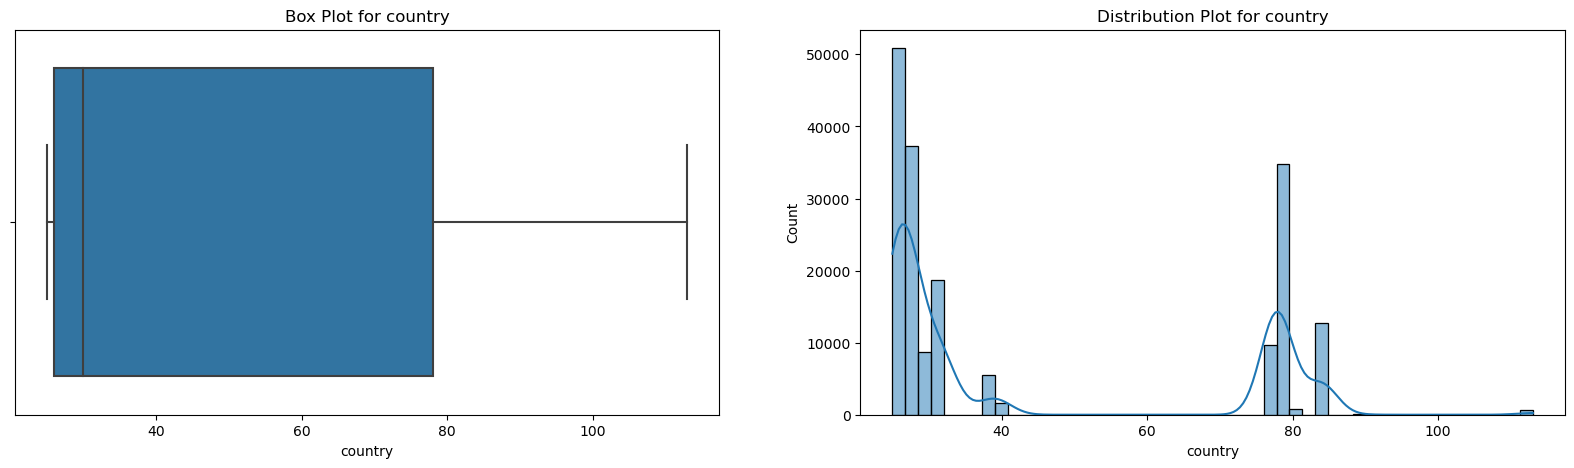

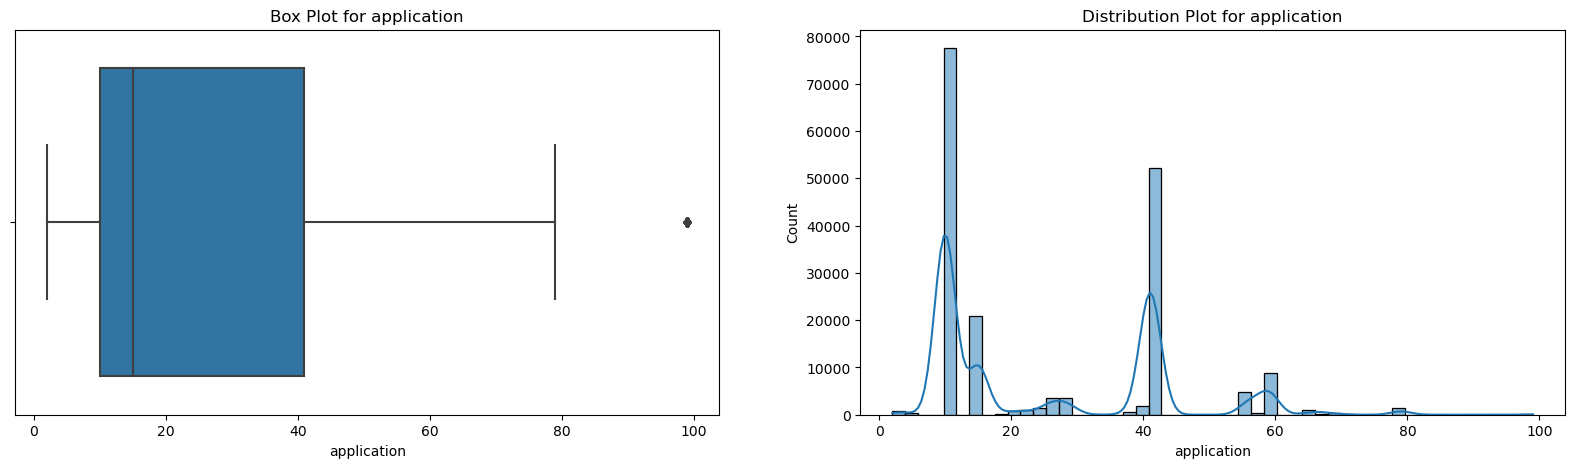

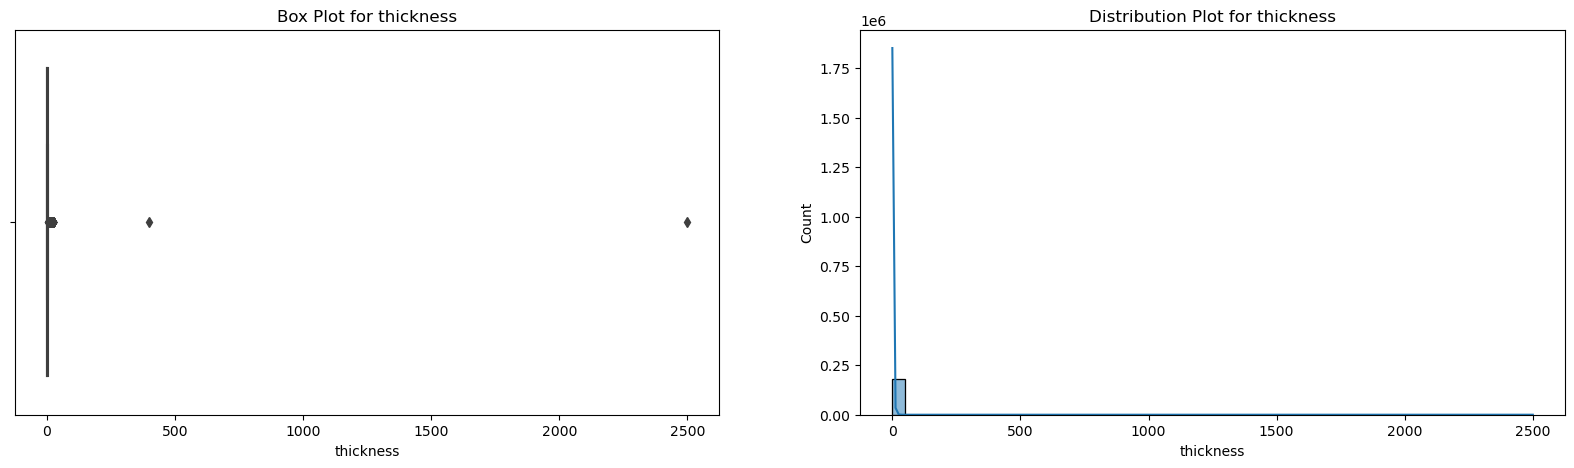

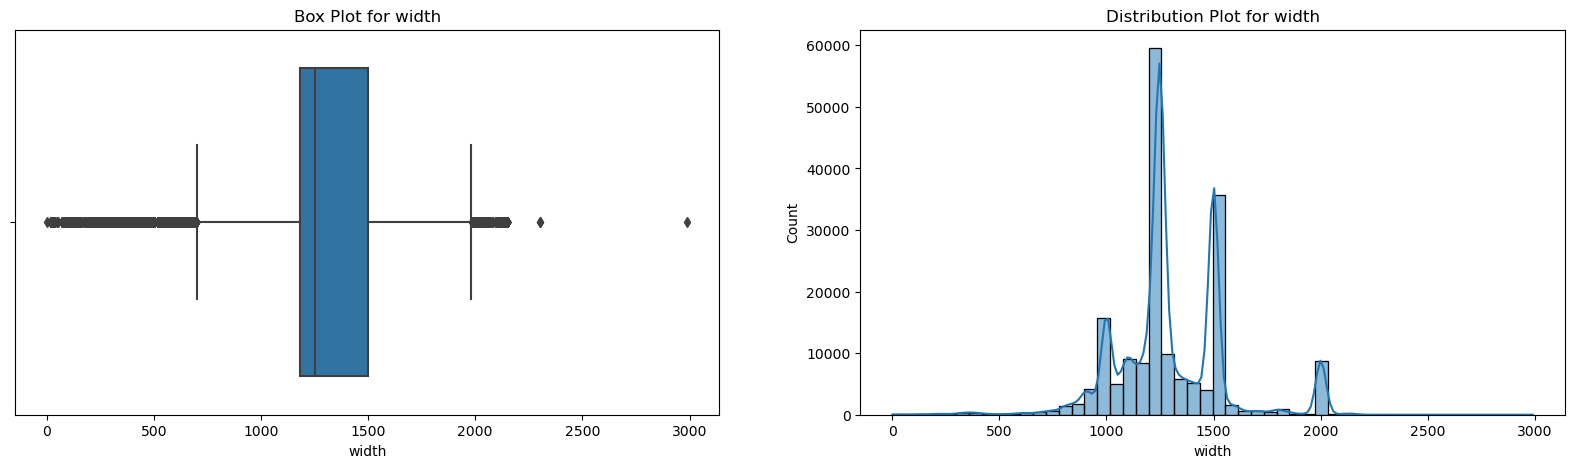

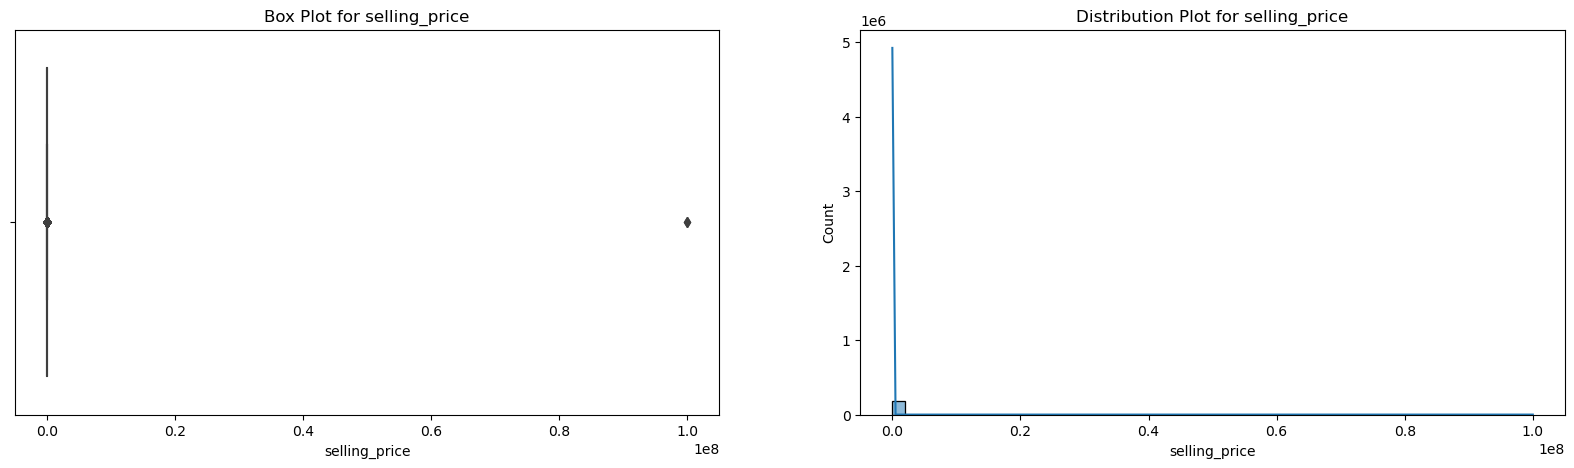

In [126]:
for i in columns_to_visualise:
    distribution(df,i)

In [127]:
# We are using the log transformation since:
#     1.it is right skewed.
#     2.data is continous.

df_new = df.copy()
df_new['quantity_tons_log'] = np.log(df_new['quantity tons'])
df_new['thickness_log'] = np.log(df_new['thickness'])
df_new['selling_price_log'] = np.log(df_new['selling_price'])
df_new

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date,delivery date,quantity_tons_log,thickness_log,selling_price_log
0,54.151139,30156308.0,28.0,1,W,10.0,2.00,1500.0,1670798778,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,768.024839,30202938.0,25.0,1,W,41.0,0.80,1210.0,1668701718,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,386.127949,30153963.0,30.0,1,WI,28.0,0.38,952.0,628377,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,202.411065,30349574.0,32.0,1,S,59.0,2.30,1317.0,1668701718,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,785.526262,30211560.0,28.0,1,W,10.0,4.00,2000.0,640665,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,1,W,41.0,0.96,1220.0,164141591,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,208.086469,30200854.0,25.0,1,W,41.0,0.95,1500.0,164141591,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,4.235594,30200854.0,25.0,1,W,41.0,0.71,1250.0,164141591,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,30.365013,30200854.0,25.0,1,W,41.0,0.85,1250.0,164141591,601.00,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


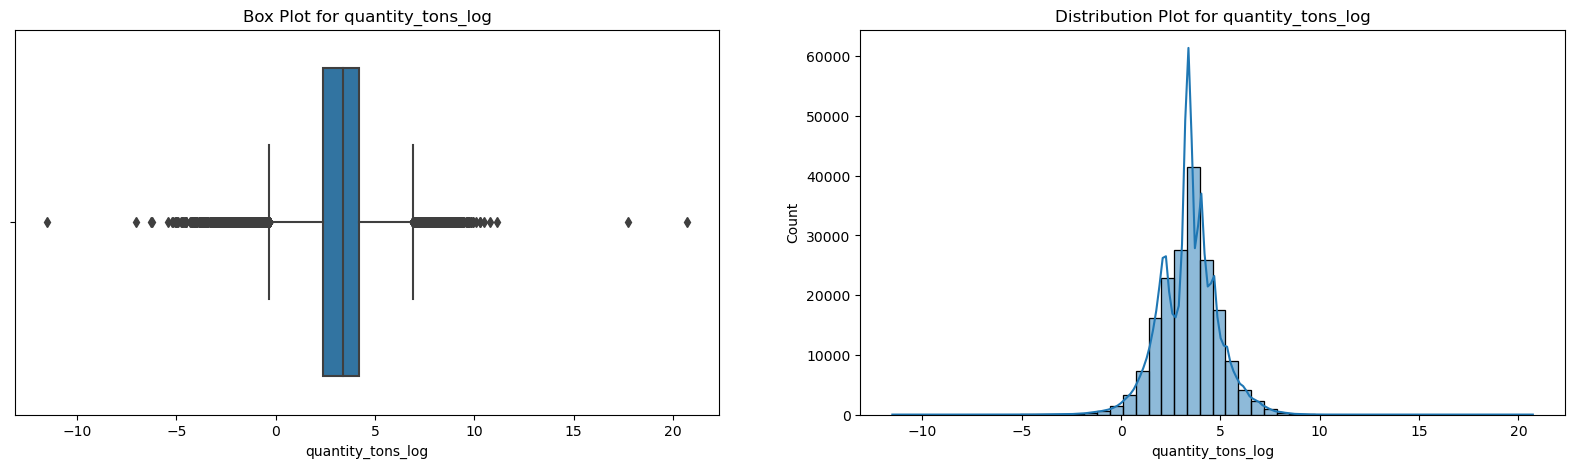

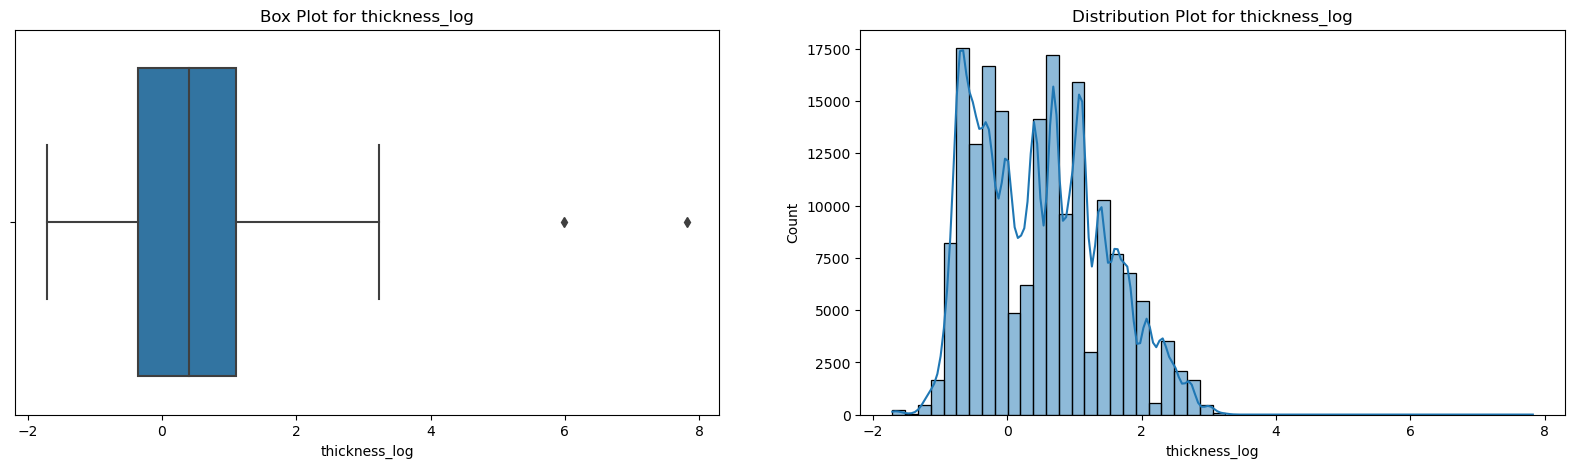

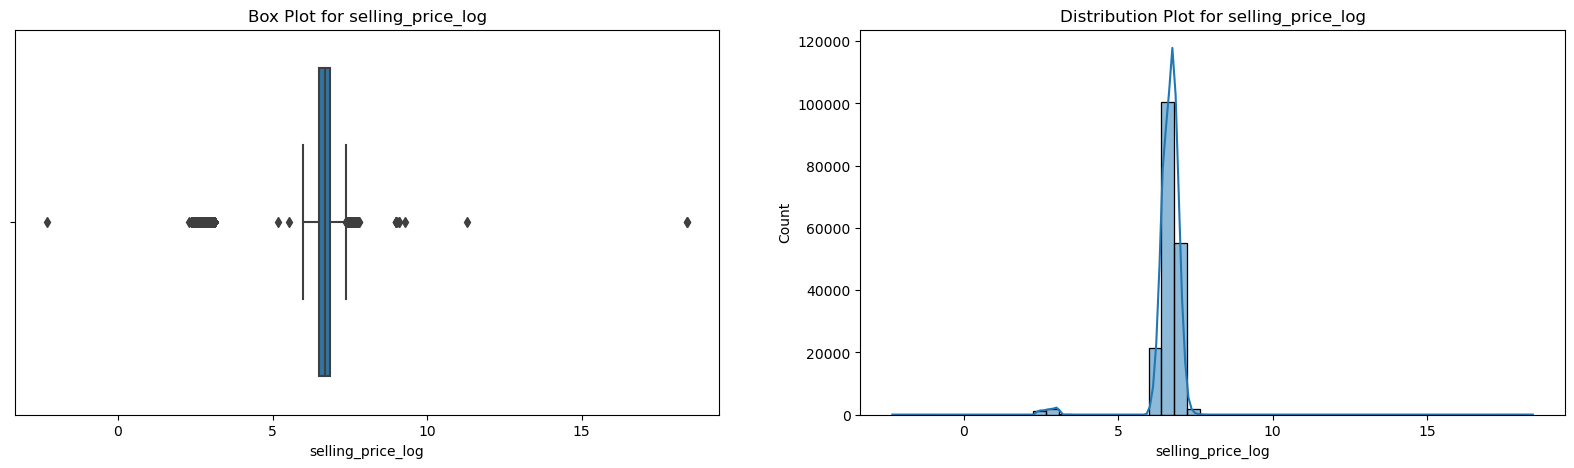

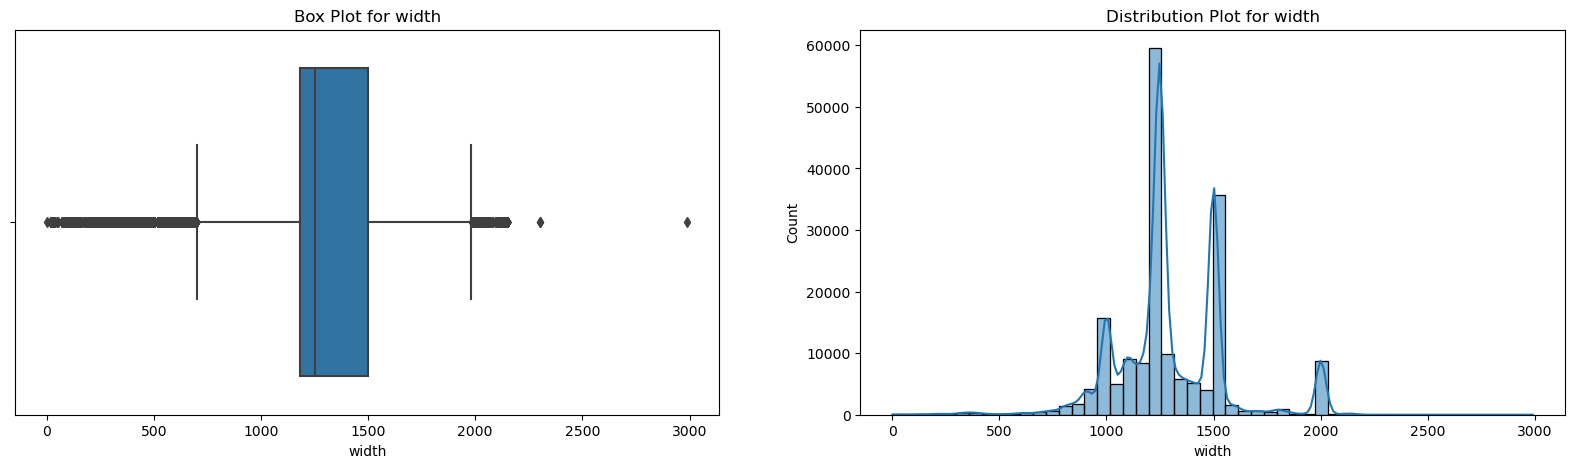

In [128]:
columns_to_visualise_new = ['quantity_tons_log', 'thickness_log', 'selling_price_log','width']
for i in columns_to_visualise_new:
    distribution(df_new,i)

In [129]:
df_new2 = df_new.copy()

In [130]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    
    
columns_to_treat_outlier = ['quantity_tons_log', 'thickness_log', 'selling_price_log','width']

for i in columns_to_treat_outlier:
    outlier(df_new2, i)

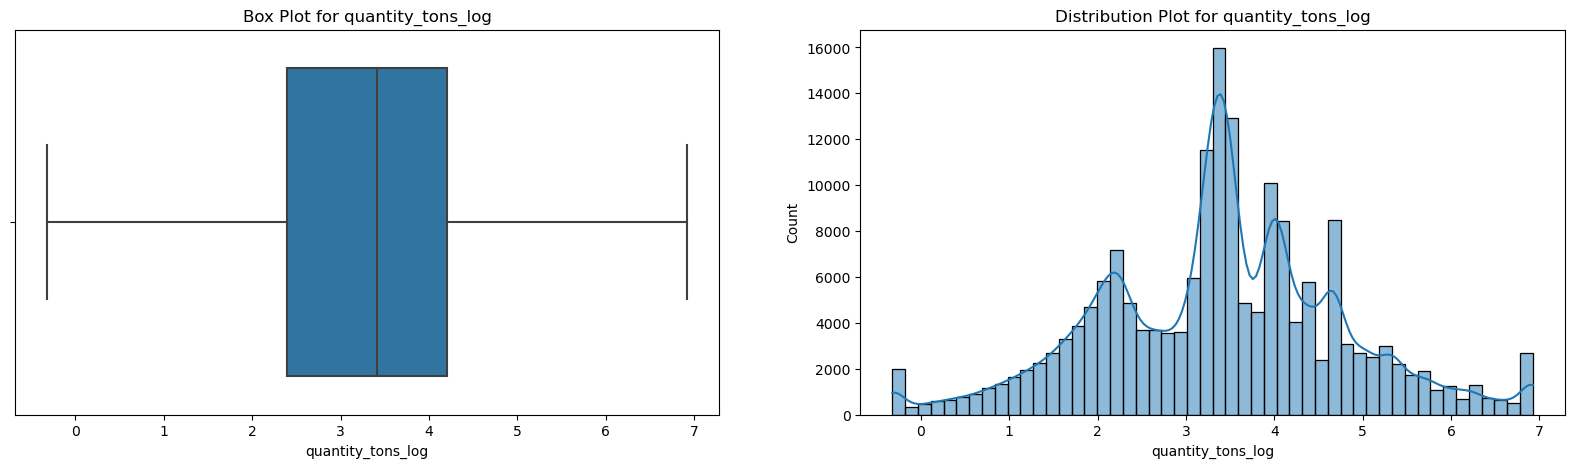

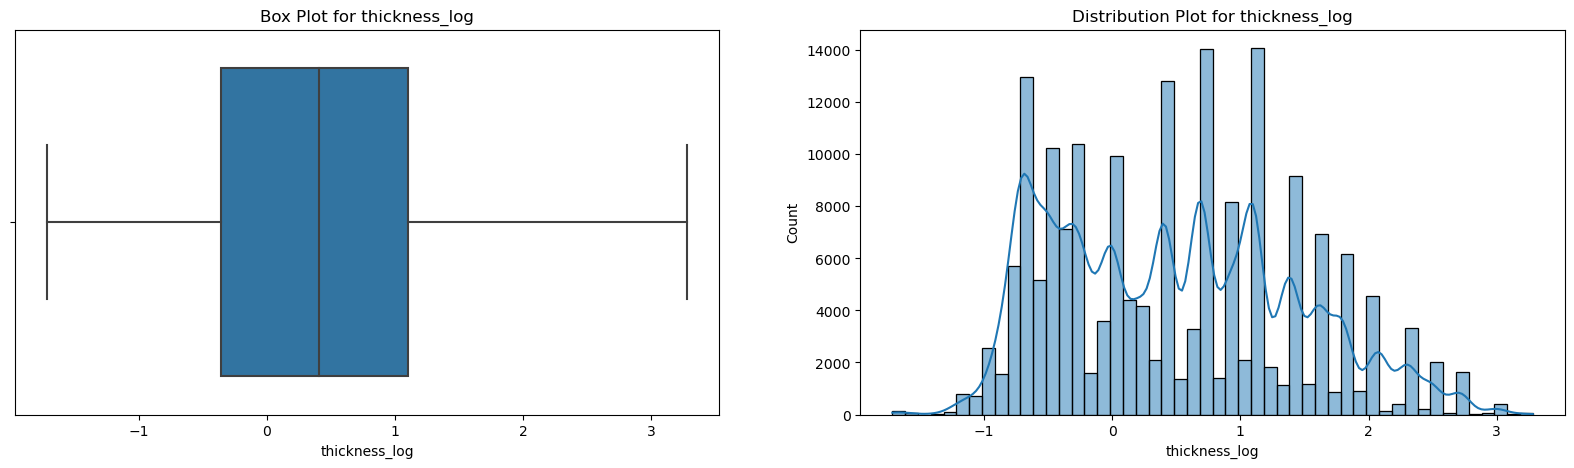

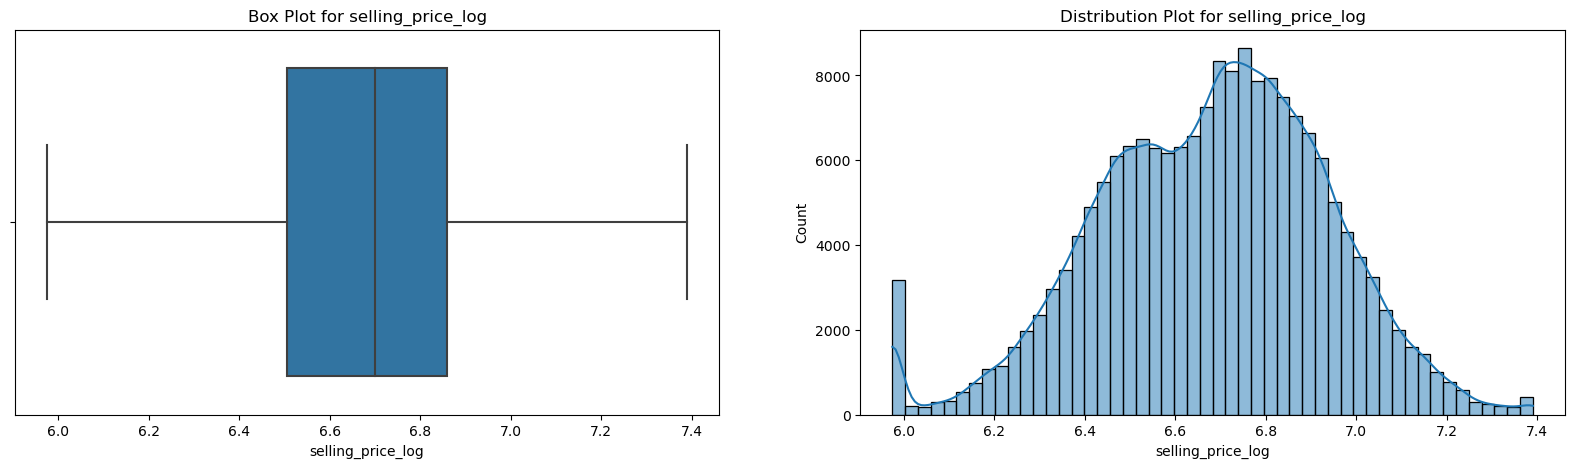

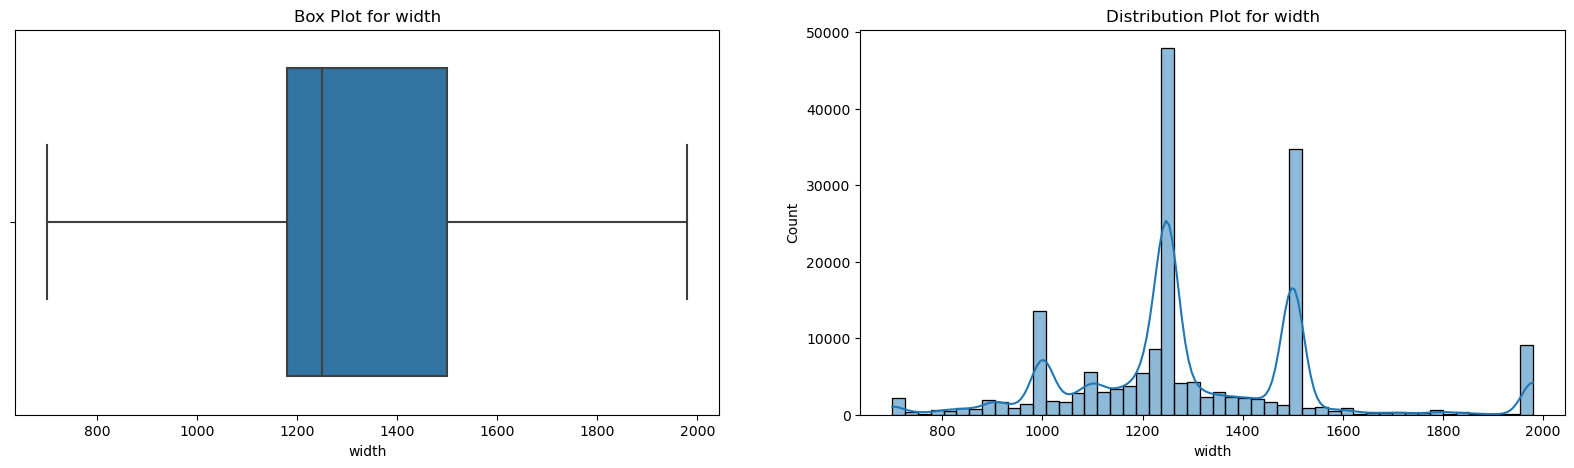

In [131]:
for i in columns_to_treat_outlier:
    distribution(df_new2,i)

In [132]:
df_new2.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date,delivery date,quantity_tons_log,thickness_log,selling_price_log
0,54.151139,30156308.0,28.0,1,W,10.0,2.00,1500.0,1670798778,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,768.024839,30202938.0,25.0,1,W,41.0,0.80,1210.0,1668701718,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,386.127949,30153963.0,30.0,1,WI,28.0,0.38,952.0,628377,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,202.411065,30349574.0,32.0,1,S,59.0,2.30,1317.0,1668701718,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,785.526262,30211560.0,28.0,1,W,10.0,4.00,1980.0,640665,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842


In [133]:
df_new2.drop(columns = ['quantity tons', 'thickness','selling_price' ], inplace = True)

In [134]:
df_new2.head()

,customer,country,status,item type,application,width,product_ref,item_date,delivery date,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,W,10.0,1500.0,1670798778,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,W,41.0,1210.0,1668701718,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,WI,28.0,952.0,628377,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,S,59.0,1317.0,1668701718,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,W,10.0,1980.0,640665,2021-04-01,2021-03-01,6.666354,1.386294,6.357842


In [135]:
label_encoder = LabelEncoder()
df_new2['itemtype_LabelEncoded'] = label_encoder.fit_transform(df_new2['item type'])

In [136]:
df_new2.head()

,customer,country,status,item type,application,width,product_ref,item_date,delivery date,quantity_tons_log,thickness_log,selling_price_log,itemtype_LabelEncoded
0,30156308.0,28.0,1,W,10.0,1500.0,1670798778,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,5
1,30202938.0,25.0,1,W,41.0,1210.0,1668701718,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,5
2,30153963.0,30.0,1,WI,28.0,952.0,628377,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,6
3,30349574.0,32.0,1,S,59.0,1317.0,1668701718,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,3
4,30211560.0,28.0,1,W,10.0,1980.0,640665,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,5


In [137]:
df_new2.dtypes

customer                 float64
country                  float64
status                     int64
item type                 object
application              float64
width                    float64
product_ref                int64
item_date                 object
delivery date             object
quantity_tons_log        float64
thickness_log            float64
selling_price_log        float64
itemtype_LabelEncoded      int32
dtype: object

In [138]:
df_new2.corr()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_13872\1546760830.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new2.corr()


,customer,country,status,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,itemtype_LabelEncoded
customer,1.000000,-0.006669,0.004775,-0.006869,0.009585,-0.007716,0.002559,0.018860,-0.025967,-0.010901
country,-0.006669,1.000000,-0.028903,-0.019304,0.053867,-0.147326,-0.090655,-0.065362,-0.019936,0.130025
status,0.004775,-0.028903,1.000000,0.085808,-0.053129,-0.008033,0.023800,-0.083867,0.032381,-0.064604
application,-0.006869,-0.019304,0.085808,1.000000,-0.198878,-0.131784,0.066483,-0.197610,0.119927,0.169124
width,0.009585,0.053867,-0.053129,-0.198878,1.000000,-0.024106,0.032100,0.401387,-0.172865,-0.092094
product_ref,-0.007716,-0.147326,-0.008033,-0.131784,-0.024106,1.000000,0.064665,0.234190,-0.059385,-0.089501
quantity_tons_log,0.002559,-0.090655,0.023800,0.066483,0.032100,0.064665,1.000000,0.041198,-0.039051,-0.324811
thickness_log,0.018860,-0.065362,-0.083867,-0.197610,0.401387,0.234190,0.041198,1.000000,-0.421189,-0.101396
selling_price_log,-0.025967,-0.019936,0.032381,0.119927,-0.172865,-0.059385,-0.039051,-0.421189,1.000000,0.095434
itemtype_LabelEncoded,-0.010901,0.130025,-0.064604,0.169124,-0.092094,-0.089501,-0.324811,-0.101396,0.095434,1.000000


<Axes: >

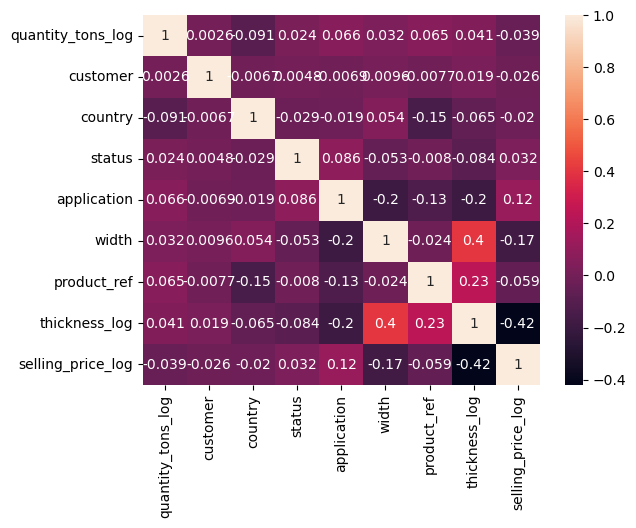

In [139]:
col = ['quantity_tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
sns.heatmap(df_new2[col].corr(), annot=True)


In [140]:
# # feature engineering
df_new3 = df_new2.copy()
df_new3['Days to delivery'] = (df_new3['delivery date'] - df_new3['item_date']).dt.days

In [141]:
df_new3.head()

,customer,country,status,item type,application,width,product_ref,item_date,delivery date,quantity_tons_log,thickness_log,selling_price_log,itemtype_LabelEncoded,Days to delivery
0,30156308.0,28.0,1,W,10.0,1500.0,1670798778,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,5,91
1,30202938.0,25.0,1,W,41.0,1210.0,1668701718,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,5,0
2,30153963.0,30.0,1,WI,28.0,952.0,628377,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,6,-90
3,30349574.0,32.0,1,S,59.0,1317.0,1668701718,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,3,-90
4,30211560.0,28.0,1,W,10.0,1980.0,640665,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,5,-31


In [142]:
df_new4 = df_new3[df_new3['Days to delivery']>=0]

In [143]:
df_new4

,customer,country,status,item type,application,width,product_ref,item_date,delivery date,quantity_tons_log,thickness_log,selling_price_log,itemtype_LabelEncoded,Days to delivery
0,30156308.0,28.0,1,W,10.0,1500.0,1670798778,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,5,91
1,30202938.0,25.0,1,W,41.0,1210.0,1668701718,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,5,0
5,30202938.0,25.0,1,W,41.0,1265.0,1668701718,2021-04-01,2021-04-01,5.419608,0.405465,6.890609,5,0
6,30209509.0,30.0,2,W,41.0,1125.0,611993,2021-04-01,2021-07-01,1.259203,-0.967584,5.975038,5,91
8,30341428.0,38.0,1,S,10.0,1275.0,1668701376,2021-04-01,2021-07-01,4.235147,-0.510826,7.217443,3,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181433,30227718.0,25.0,0,S,15.0,1980.0,640665,2020-07-02,2020-08-01,3.472467,1.791759,6.313548,3,30
181525,30161559.0,30.0,0,S,10.0,1525.0,640665,2020-07-02,2020-08-01,4.196171,1.348073,6.126869,3,30
181527,30161559.0,30.0,0,S,10.0,1525.0,640665,2020-07-02,2020-08-01,4.156686,1.766442,6.124683,3,30
181529,30161559.0,30.0,0,S,10.0,1500.0,640665,2020-07-02,2020-08-01,4.025862,2.060514,6.126869,3,30


In [144]:
df_new4 = df_new4.reset_index(drop = True)

In [145]:
df_new4

,customer,country,status,item type,application,width,product_ref,item_date,delivery date,quantity_tons_log,thickness_log,selling_price_log,itemtype_LabelEncoded,Days to delivery
0,30156308.0,28.0,1,W,10.0,1500.0,1670798778,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,5,91
1,30202938.0,25.0,1,W,41.0,1210.0,1668701718,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,5,0
2,30202938.0,25.0,1,W,41.0,1265.0,1668701718,2021-04-01,2021-04-01,5.419608,0.405465,6.890609,5,0
3,30209509.0,30.0,2,W,41.0,1125.0,611993,2021-04-01,2021-07-01,1.259203,-0.967584,5.975038,5,91
4,30341428.0,38.0,1,S,10.0,1275.0,1668701376,2021-04-01,2021-07-01,4.235147,-0.510826,7.217443,3,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165560,30227718.0,25.0,0,S,15.0,1980.0,640665,2020-07-02,2020-08-01,3.472467,1.791759,6.313548,3,30
165561,30161559.0,30.0,0,S,10.0,1525.0,640665,2020-07-02,2020-08-01,4.196171,1.348073,6.126869,3,30
165562,30161559.0,30.0,0,S,10.0,1525.0,640665,2020-07-02,2020-08-01,4.156686,1.766442,6.124683,3,30
165563,30161559.0,30.0,0,S,10.0,1500.0,640665,2020-07-02,2020-08-01,4.025862,2.060514,6.126869,3,30


In [146]:
df_new5 = df_new3[df_new3['Days to delivery']<0]

In [147]:
df_new5

,customer,country,status,item type,application,width,product_ref,item_date,delivery date,quantity_tons_log,thickness_log,selling_price_log,itemtype_LabelEncoded,Days to delivery
2,30153963.0,30.0,1,WI,28.0,952.0,628377,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,6,-90
3,30349574.0,32.0,1,S,59.0,1317.0,1668701718,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,3,-90
4,30211560.0,28.0,1,W,10.0,1980.0,640665,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,5,-31
7,30342192.0,32.0,1,W,41.0,1220.0,611993,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,5,-90
11,30342192.0,32.0,1,W,41.0,1220.0,611993,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,5,-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,W,41.0,1220.0,164141591,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,5,-1
181669,30200854.0,25.0,1,W,41.0,1500.0,164141591,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,5,-1
181670,30200854.0,25.0,1,W,41.0,1250.0,164141591,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,5,-1
181671,30200854.0,25.0,1,W,41.0,1250.0,164141591,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595,5,-1


In [148]:
df_new3.describe()

,customer,country,status,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,itemtype_LabelEncoded,Days to delivery
count,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000
mean,3.051221e+07,44.890727,1.316684,25.614406,1297.045583,4.739679e+08,3.392950,0.480332,6.680786,4.133036,59.990802
std,2.433375e+07,24.403034,1.330310,17.753421,248.961933,7.175101e+08,1.394622,0.933568,0.255379,1.055230,46.814758
min,1.245800e+04,25.000000,0.000000,2.000000,700.000000,6.117280e+05,-0.322334,-1.714798,5.975038,0.000000,-689.000000
25%,3.019688e+07,26.000000,1.000000,10.000000,1180.000000,6.119930e+05,2.395316,-0.356675,6.505784,3.000000,28.000000
50%,3.020524e+07,30.000000,1.000000,15.000000,1250.000000,6.406650e+05,3.413291,0.405465,6.699500,5.000000,59.000000
75%,3.028042e+07,78.000000,1.000000,41.000000,1500.000000,1.332077e+09,4.207084,1.098612,6.859615,5.000000,97.000000
max,2.147484e+09,113.000000,8.000000,99.000000,1980.000000,1.722208e+09,6.924734,3.281543,7.390361,6.000000,448.000000


In [149]:
mean_days_to_deliver = df_new3['Days to delivery'].mean()

In [150]:
mean_days_to_deliver

59.99080215552118

In [151]:
df_new3['Days to delivery']  = df_new3['Days to delivery'].apply(lambda x:mean_days_to_deliver if x<= 0 else x)

In [152]:
df_new3.head()

,customer,country,status,item type,application,width,product_ref,item_date,delivery date,quantity_tons_log,thickness_log,selling_price_log,itemtype_LabelEncoded,Days to delivery
0,30156308.0,28.0,1,W,10.0,1500.0,1670798778,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,5,91.000000
1,30202938.0,25.0,1,W,41.0,1210.0,1668701718,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,5,59.990802
2,30153963.0,30.0,1,WI,28.0,952.0,628377,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,6,59.990802
3,30349574.0,32.0,1,S,59.0,1317.0,1668701718,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,3,59.990802
4,30211560.0,28.0,1,W,10.0,1980.0,640665,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,5,59.990802


In [153]:
df_final = df_new3.drop(columns = ['item type','item_date','delivery date'])

In [154]:
df_final.dtypes

customer                 float64
country                  float64
status                     int64
application              float64
width                    float64
product_ref                int64
quantity_tons_log        float64
thickness_log            float64
selling_price_log        float64
itemtype_LabelEncoded      int32
Days to delivery         float64
dtype: object

In [155]:
df_final.head()

,customer,country,status,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,itemtype_LabelEncoded,Days to delivery
0,30156308.0,28.0,1,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,5,91.000000
1,30202938.0,25.0,1,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,5,59.990802
2,30153963.0,30.0,1,28.0,952.0,628377,5.956169,-0.967584,6.468211,6,59.990802
3,30349574.0,32.0,1,59.0,1317.0,1668701718,5.310301,0.832909,6.643790,3,59.990802
4,30211560.0,28.0,1,10.0,1980.0,640665,6.666354,1.386294,6.357842,5,59.990802


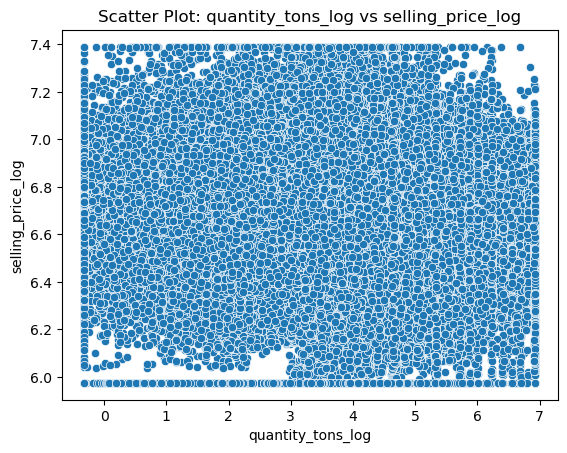

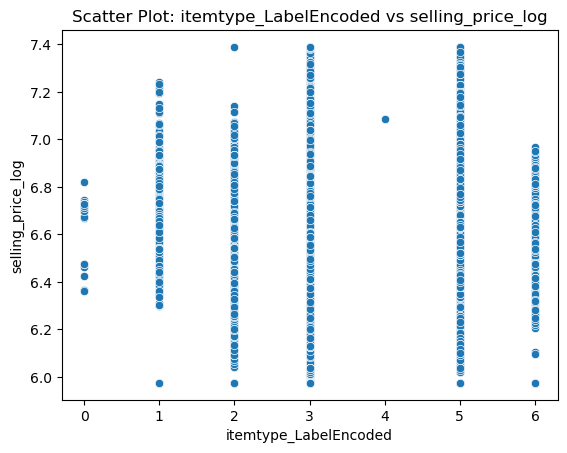

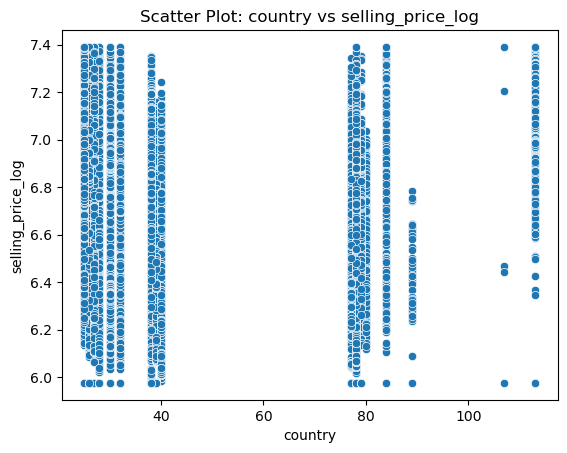

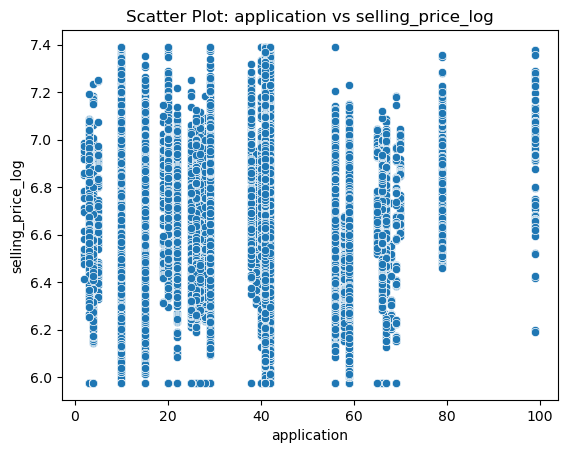

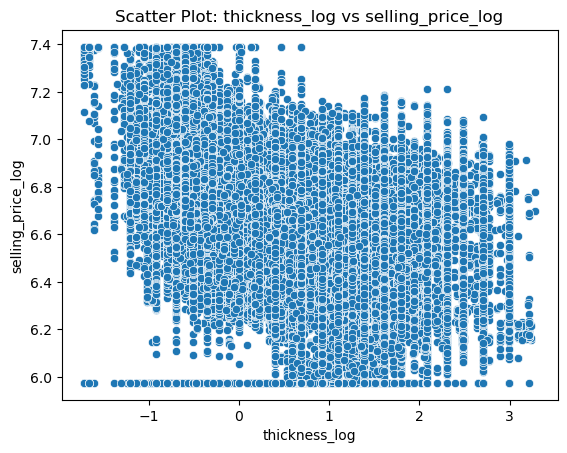

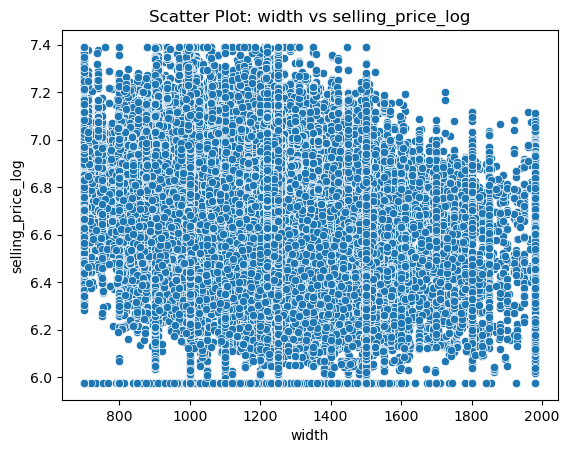

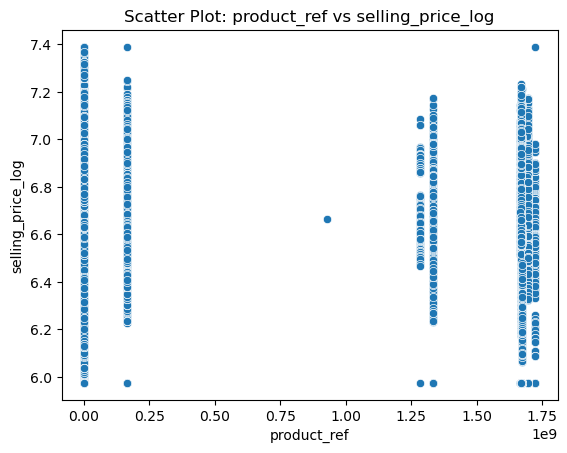

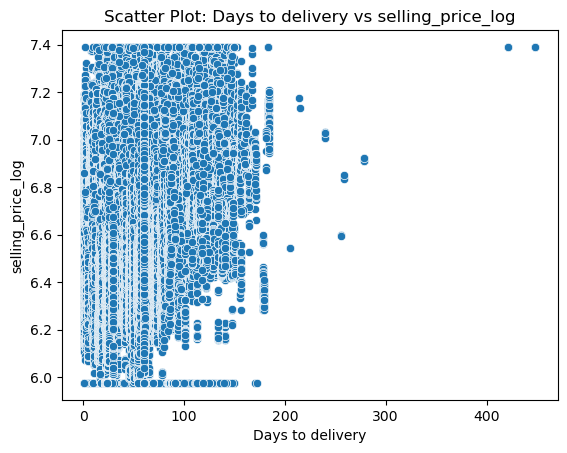

In [156]:
for feature in ['quantity_tons_log','itemtype_LabelEncoded','country','application','thickness_log','width', 'product_ref','Days to delivery']:
    sns.scatterplot(x=df_final[feature], y=df_final['selling_price_log'])
    plt.title(f'Scatter Plot: {feature} vs selling_price_log')
    plt.show()

In [157]:
from sklearn.model_selection import train_test_split

x = df_final[['quantity_tons_log','itemtype_LabelEncoded','country','application','thickness_log','width', 'product_ref','Days to delivery']].values
y = df_final[['selling_price_log']].values

# Desicion tree regressor

In [158]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [159]:
param_grid = {'max_depth': [3, 5, 7, 10, 15]}
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_depth = grid_search.best_params_['max_depth']
print(f'Best Max Depth: {best_depth}')

Best Max Depth: 15


In [160]:
tree_reg = DecisionTreeRegressor(max_depth=15)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

In [161]:
y_pred

array([6.98849047, 7.12306076, 6.62020138, ..., 7.04572457, 7.15454075,
       6.75075249])

In [162]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('\n\n')
print('Mean_squared_error:', mse)
print('r2 score:', r2)




Mean_squared_error: 0.016625659049252547
r2 score: 0.7438079185723736


# Random forest regressor

In [163]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train.ravel())  

y_pred_random = rf_regressor.predict(X_test)

In [164]:
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

In [165]:
print('\n\n')
print('Mean_squared_error_random:', mse_random)
print('r2 score_random:', r2_random)




Mean_squared_error_random: 0.009731945942183509
r2 score_random: 0.8500361712048206


In [200]:
feature_importance = rf_regressor.feature_importances_

In [202]:
for i,v in zip(['quantity_tons_log','itemtype_LabelEncoded','country','application','thickness_log','width', 'product_ref','Days to delivery'], feature_importance):
    print('Feature importances',(i,v))

Feature importances ('quantity_tons_log', 0.10894804170165585)
Feature importances ('itemtype_LabelEncoded', 0.024526127029874098)
Feature importances ('country', 0.09920604259777903)
Feature importances ('application', 0.04465976334996118)
Feature importances ('thickness_log', 0.06246403139557243)
Feature importances ('width', 0.04507395513374326)
Feature importances ('product_ref', 0.2949205840284832)
Feature importances ('Days to delivery', 0.3202014547629307)


# If we expect the material to deliver in a short span of time the price varies, most probably on the higher end. Days to delivery is important

# KNN REGRESSOR

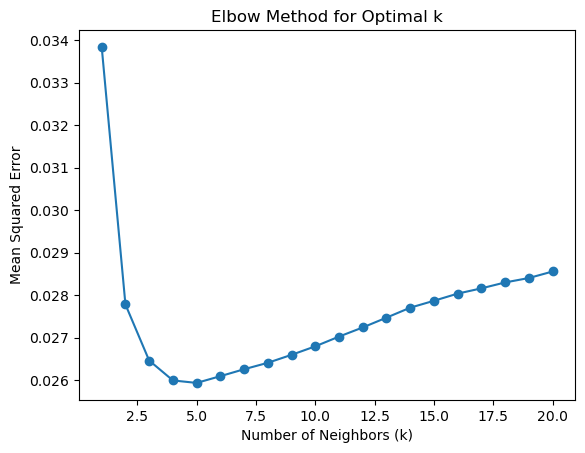

In [166]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# knn_regressor = KNeighborsRegressor(n_neighbors=3)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

mse_values = []

k_values = range(1, 21)
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_std, y_train)
    y_pred_knn = knn_regressor.predict(X_test_std)
    mse = mean_squared_error(y_test, y_pred_knn)
    mse_values.append(mse)

plt.plot(k_values, mse_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.show()

In [167]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
search.fit(X_train_std, y_train)

k = search.best_params_

In [168]:
k

{'n_neighbors': 5}

In [169]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_std, y_train)
y_pred_knn = knn.predict(X_test_std)
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)
print('\n\n')
print('Mean_squared_error_knn:', mse)
print('r2 score_knn:', r2)




Mean_squared_error_knn: 0.025932345386211458
r2 score_knn: 0.6003971017863319


# We choose Random Forest

# classification

In [170]:
classification_status = df_final[(df_final['status'] == 1) | (df_final['status'] == 0)]

In [171]:
classification_status

,customer,country,status,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,itemtype_LabelEncoded,Days to delivery
0,30156308.0,28.0,1,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,5,91.000000
1,30202938.0,25.0,1,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,5,59.990802
2,30153963.0,30.0,1,28.0,952.0,628377,5.956169,-0.967584,6.468211,6,59.990802
3,30349574.0,32.0,1,59.0,1317.0,1668701718,5.310301,0.832909,6.643790,3,59.990802
4,30211560.0,28.0,1,10.0,1980.0,640665,6.666354,1.386294,6.357842,5,59.990802
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,5,59.990802
181669,30200854.0,25.0,1,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,5,59.990802
181670,30200854.0,25.0,1,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,5,59.990802
181671,30200854.0,25.0,1,41.0,1250.0,164141591,3.413291,-0.162519,6.398595,5,59.990802


In [172]:
# checking for class distribution
classification_status['status'].value_counts()

1    116012
0     34438
Name: status, dtype: int64

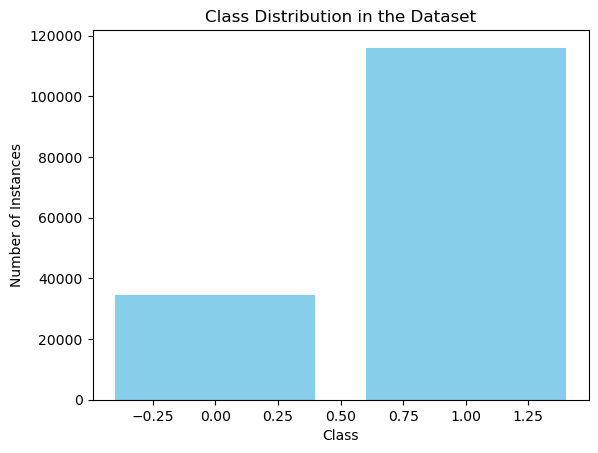

In [173]:
class_counts = classification_status['status'].value_counts()
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in the Dataset')
plt.show()

In [174]:
classification_status.head()

,customer,country,status,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,itemtype_LabelEncoded,Days to delivery
0,30156308.0,28.0,1,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,5,91.000000
1,30202938.0,25.0,1,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,5,59.990802
2,30153963.0,30.0,1,28.0,952.0,628377,5.956169,-0.967584,6.468211,6,59.990802
3,30349574.0,32.0,1,59.0,1317.0,1668701718,5.310301,0.832909,6.643790,3,59.990802
4,30211560.0,28.0,1,10.0,1980.0,640665,6.666354,1.386294,6.357842,5,59.990802


In [175]:
X = classification_status[['quantity_tons_log','itemtype_LabelEncoded','country','application','thickness_log','width', 'product_ref','Days to delivery']].values
y = classification_status[['status']].values

In [176]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [177]:
X.shape

(150450, 8)

In [178]:
y.shape

(150450, 1)

In [179]:
X_resampled.shape

(232024, 8)

In [180]:
y_resampled.shape

(232024,)

# Decision tree classifier

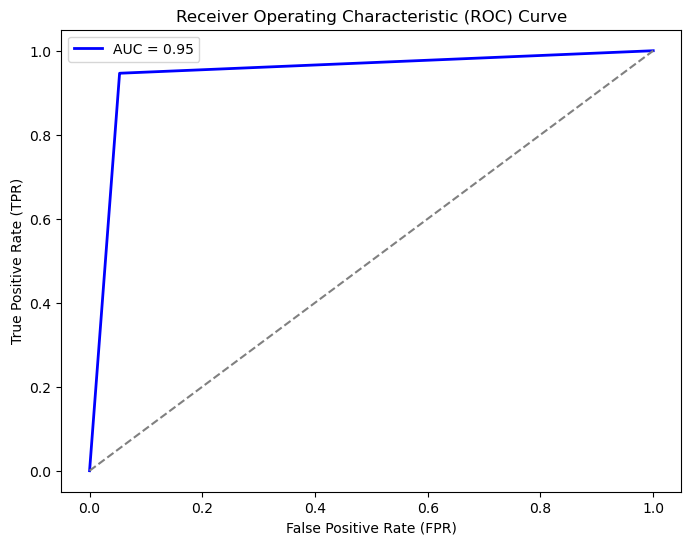

Accuracy on the test set: 0.95
F1 Score: 0.95


In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_decisiontree_classifier = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_decisiontree_classifier)
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()


print(f"Accuracy on the test set: {accuracy:.2f}")
f1 = f1_score(y_test, y_pred_decisiontree_classifier)
print(f"F1 Score: {f1:.2f}")

# Random forest classifier

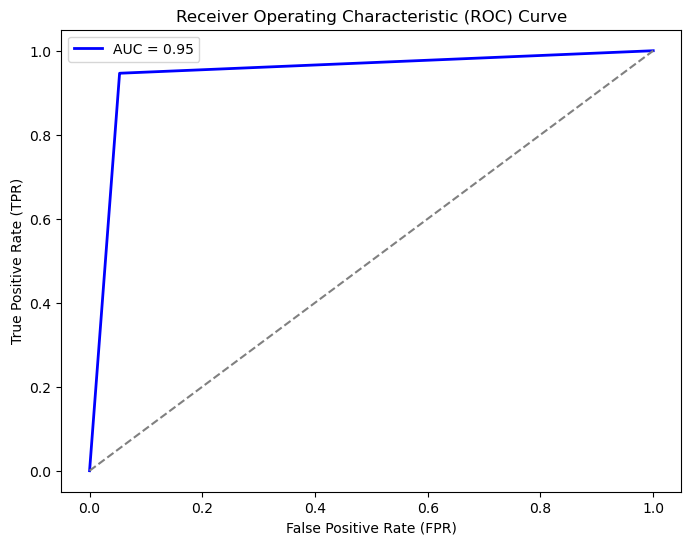

Accuracy on the test set: 0.97
F1 Score: 0.96


In [190]:
from sklearn.ensemble import RandomForestClassifier

clf_randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
clf_randomforest.fit(X_train, y_train)

y_pred_random_forest = clf_randomforest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_random_forest)
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

print(f"Accuracy on the test set: {accuracy:.2f}")
f1 = f1_score(y_test, y_pred_random_forest)
print(f"F1 Score: {f1:.2f}")

# KNN Classifier

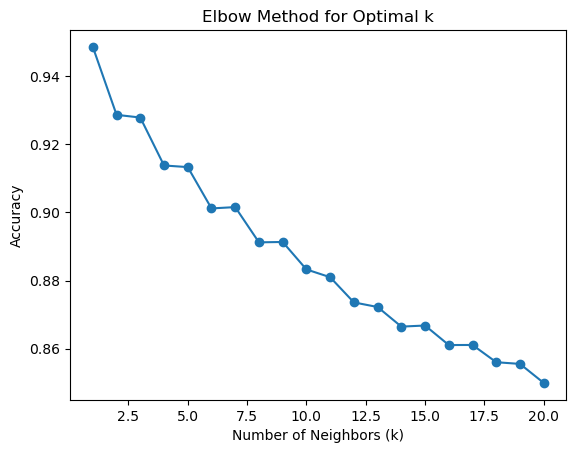

In [185]:
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 21)
accuracy_values = []
for k in k_values:

    clf_kNN_classifier = KNeighborsClassifier(n_neighbors=k)
    clf_kNN_classifier.fit(X_train, y_train)
    y_pred_knn_classifier = clf_kNN_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn_classifier)
    accuracy_values.append(accuracy)
    
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [194]:
accuracy_values

[0.9485831268182308,
 0.9286499299644435,
 0.927852602090292,
 0.9137808425816184,
 0.9133067557375283,
 0.9011744424092232,
 0.9015623316452969,
 0.8912186186833315,
 0.891326365693352,
 0.8832668893438207,
 0.8809826527313867,
 0.8735912078439824,
 0.8722335955177244,
 0.8664799051826312,
 0.8668031462126926,
 0.8610710052796035,
 0.8610925546816076,
 0.8560284452106454,
 0.8555328089645512,
 0.8499515138454908]

In [195]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

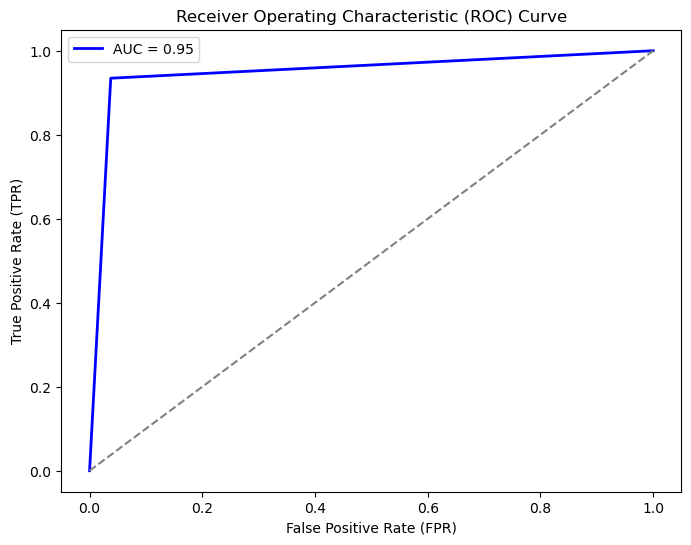

F1 Score: 0.96
Accuracy on the test set: 0.95


In [196]:
y_probs = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

f1 = f1_score(y_test, y_pred_random_forest)
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy on the test set: {accuracy:.2f}")

In [197]:
# We are choosing random forest classifier

#Feature importance

feature_importance = clf_randomforest.feature_importances_

In [199]:
for i,v in zip(['quantity_tons_log','itemtype_LabelEncoded','country','application','thickness_log','width', 'product_ref','Days to delivery'], feature_importance):
    print('Feature importances',(i,v))

Feature importances ('quantity_tons_log', 0.15717538500548262)
Feature importances ('itemtype_LabelEncoded', 0.13087915511582704)
Feature importances ('country', 0.13338984263856027)
Feature importances ('application', 0.09507140136195727)
Feature importances ('thickness_log', 0.10109823509156825)
Feature importances ('width', 0.06675574868024296)
Feature importances ('product_ref', 0.06664874786268693)
Feature importances ('Days to delivery', 0.24898148424367472)


# So now depending upon the number of days to deliver the material to the customer plays a very major role in copper industry. 